# Preparação inicial

In [69]:
# Imports
import sympy as sp
from sympy import E
from sympy import init_printing
import numpy as np
import matplotlib.pyplot as plt

# Ativando o pretty printing
init_printing(order='none')

# Resoluções

## 1. Física – Movimento Retilíneo

A aceleração de uma partícula em movimento retilíneo é dada por: $a(t) = 6t$

Sabendo que a velocidade inicial no instante $t = 0$ é $v(0) = 2 m/s$, determine:

- A expressão da velocidade $v(t)$.
- A função posição $s(t)$, sabendo que $s(0) = 0$.

In [70]:
# Definindo uma variável t e uma constante C
t = sp.Symbol('t')
C = sp.Symbol('C')

# Definindo a função
# a(t)
a = 6*t

# Calculando a primeira integral de a(t) = 6t para obtermos v(t)
v = sp.integrate(a, t) + C
v

In [71]:
# Encontrando v(0)
v_0 = v.subs(v, 0) + C
v_0

In [72]:
# Resolvendo v_0 = 2 para encontrar C
equation = sp.Eq(v_0, 2)
C_val = sp.solve(equation)[0]
C_val

In [73]:
# V(t)
# Substituindo o valor de C na primeira integral
v_num = v.subs(C, C_val)
v_num

In [74]:
# Calculando a segunda integral para obtermos s(t)
s = sp.integrate(v_num, t) + C
s

In [75]:
# Encontrando s(0)
s_0 = s.subs(t, 0)
s_0

In [76]:
# Resolvendo s_0 = 0 para encontrar C
equation = sp.Eq(s_0, 0)
C_val = sp.solve(equation)[0]
C_val

In [77]:
# S(t)
# Substituindo o valor de C na segunda integral
s_num = s.subs(C, C_val)
s_num

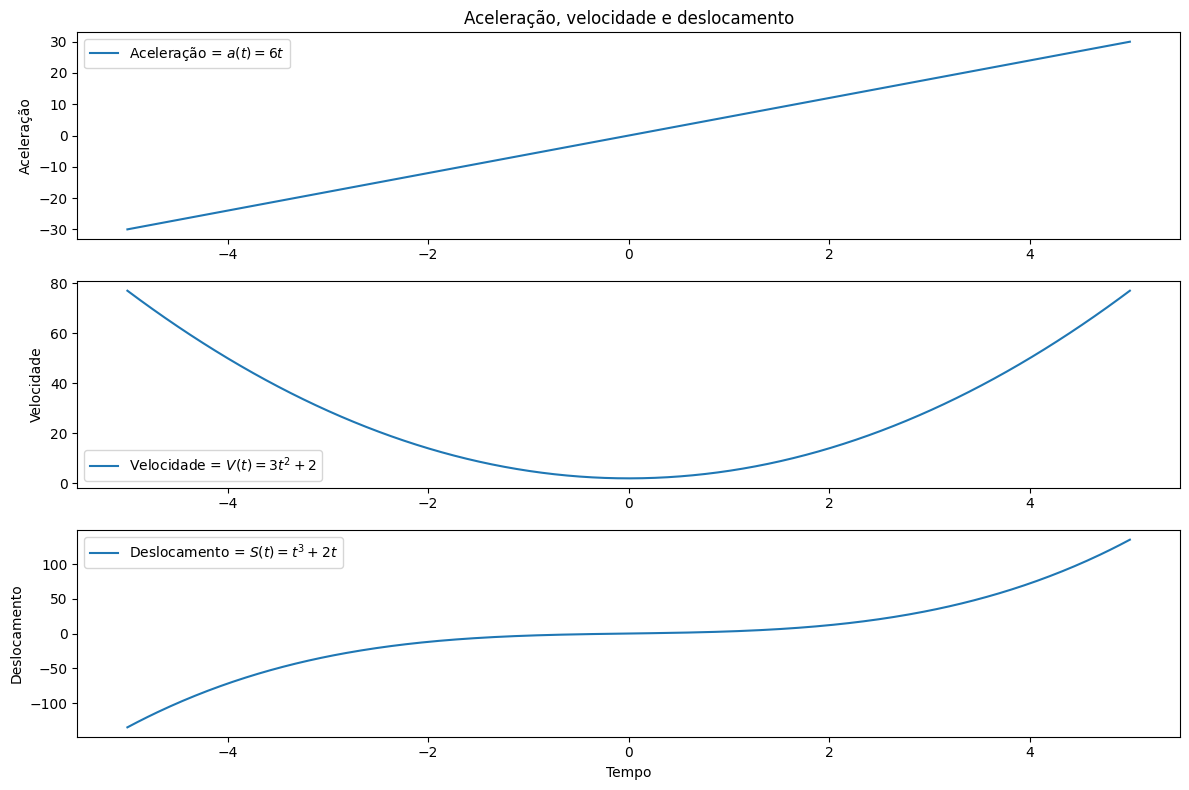

In [78]:
# Plotando 3 gráficos separados para a(t), v(t) e s(t)

# t_vals
t_vals = np.linspace(-5, 5, 400)

# Convertendo em funções lambda
a_lambdified = sp.lambdify(t, a, 'numpy')
v_lambdified = sp.lambdify(t, v_num, 'numpy')
s_lambdified = sp.lambdify(t, s_num, 'numpy')

# Calculando as funções para t_vals
a_vals = a_lambdified(t_vals)
v_vals = v_lambdified(t_vals)
s_vals = s_lambdified(t_vals)

# Criando o gráfico
plt.figure(figsize=(12, 8))

# Gráfico aceleração
plt.subplot(3, 1, 1)
plt.plot(t_vals, a_vals, label='Aceleração = $a(t) = 6t$')
plt.ylabel('Aceleração')
plt.title('Aceleração, velocidade e deslocamento')
plt.legend()

# Gráfico velocidade
plt.subplot(3, 1, 2)
plt.plot(t_vals, v_vals, label='Velocidade = $V(t) = 3t^2 + 2$')
plt.ylabel('Velocidade')
plt.legend()

# Gráfico deslocamento
plt.subplot(3, 1, 3)
plt.plot(t_vals, s_vals, label='Deslocamento = $S(t) = t^3 + 2t$')
plt.xlabel('Tempo')
plt.ylabel('Deslocamento')
plt.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

## 2. Economia – Custo Marginal

O custo marginal de produção de certo bem é dado por: $C'(x) = 5x^2 - 2x + 20$

Sabendo que o custo fixo é $C(0) = 100$, determine a função custo total $C(x)$.

In [79]:
# Definindo uma variável x
x = sp.Symbol('x')

# Definindo a função C'(x) - custo marginal
custo_marginal = 5*x**2 - 2*x + 20
custo_marginal

In [80]:
# Calculando a integral de C'(x) para obtermos C(x) - custo total
custo_total = sp.integrate(custo_marginal, x) + C
custo_total

In [81]:
# Substituindo o valor de C (C = 100)
custo_total_num = custo_total.subs(C, 100)
custo_total_num

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


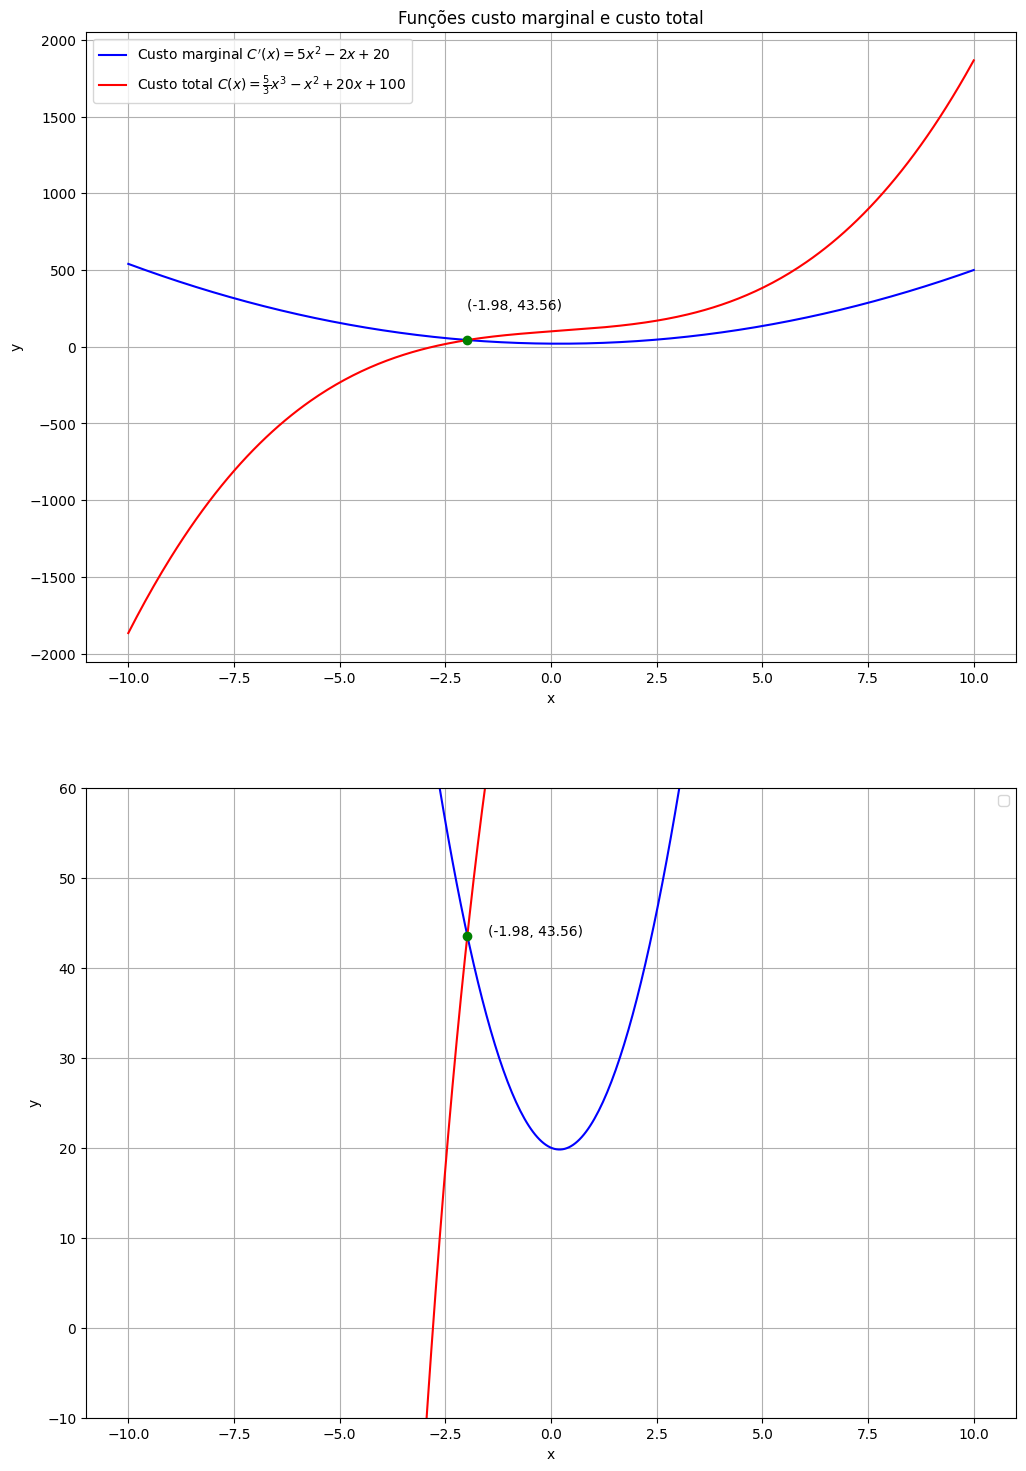

In [82]:
# Plotando os gráficos

# x_vals
x_vals = np.linspace(-10, 10, 400)

# Convertendo em funções lambda
custo_marginal_lambdified = sp.lambdify(x, custo_marginal, 'numpy')
custo_total_lambdified = sp.lambdify(x, custo_total_num, 'numpy')

# Calculando a função para valores de x_vals
custo_marginal_vals = custo_marginal_lambdified(x_vals)
custo_total_vals = custo_total_lambdified(x_vals)

# Criando o gráfico
plt.figure(figsize=(12, 18))

# Plotando função original e integral
plt.subplot(2, 1, 1)
plt.plot(x_vals, custo_marginal_vals, label='Custo marginal $C\'(x) = 5x^2 - 2x + 20$', color='blue')
plt.plot(x_vals, custo_total_vals, label=r'Custo total $C(x) = \frac{5}{3}x^3 - x^2 + 20x + 100$', color='red')
plt.title('Funções custo marginal e custo total')
plt.grid(True)

# Calculando o ponto de interseção entre as funções
# Criamos uma igualdade C'(x) = C(x) e obtemos o valor de x
x_intersecao = sp.solve(sp.Eq(custo_total_num, custo_marginal), x)[2]
# Obtemos o valor de y
y_intersecao = custo_marginal_lambdified(x_intersecao)
# Ajustando as casas decimais para a legenda
x_intersecao_text = f"{x_intersecao:.2f}"
y_intersecao_text = f"{y_intersecao:.2f}"
# Plotando o ponto e legenda
plt.plot(x_intersecao, y_intersecao, marker='o', color='green')
plt.text(x_intersecao, y_intersecao + 200, f'({x_intersecao_text}, {y_intersecao_text})')

# Adicionando rótulos e legenda ao gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Mostrando em outra escala
plt.subplot(2, 1, 2)
plt.plot(x_vals, custo_marginal_vals, color='blue')
plt.plot(x_vals, custo_total_vals, color='red')
plt.ylim(-10, 60)
plt.plot(x_intersecao, y_intersecao, marker='o', color='green')
plt.text(x_intersecao+0.5, y_intersecao, f'({x_intersecao_text}, {y_intersecao_text})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

## 3. Engenharia – Trabalho de uma Força

Uma força variável ao longo de um deslocamento $x$ é descrita por: $F(x) = 4x^3 (N)$

Determine a expressão do trabalho $W(x)$ realizado por essa força no intervalo de deslocamento de $0$ a $x$.

In [83]:
# Definindo a função F(x)
forca_variavel = 4*x**3
forca_variavel

In [84]:
# Calculando a integral para obtermos W(x)
trabalho = sp.integrate(forca_variavel, x)
trabalho

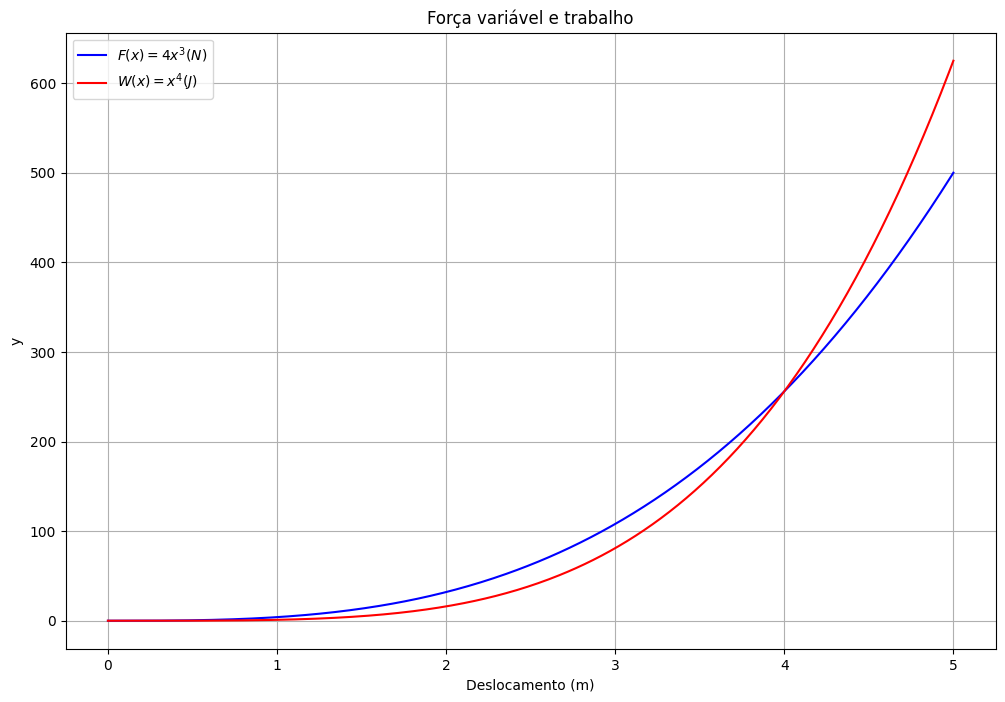

In [85]:
# Plotando os gráficos

# x_vals
x_vals = np.linspace(0, 5, 400)

# Convertendo em funções lambda
forca_variavel_lambdified = sp.lambdify(x, forca_variavel, 'numpy')
trabalho_lambdified = sp.lambdify(x, trabalho, 'numpy')

# Calculando as funções para x_vals
forca_vals = forca_variavel_lambdified(x_vals)
trabalho_vals = trabalho_lambdified(x_vals)

# Criando o gráfico
plt.figure(figsize=(12, 8))

# Plotando as funções
plt.plot(x_vals, forca_vals, label='$F(x) = 4x^3 (N)$', color='blue')
plt.plot(x_vals, trabalho_vals, label='$W(x) = x^4 (J)$', color='red')

# Adicionando rótulos e legenda ao gráfico
plt.xlabel('Deslocamento (m)')
plt.ylabel('y')
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.title('Força variável e trabalho')
plt.show()

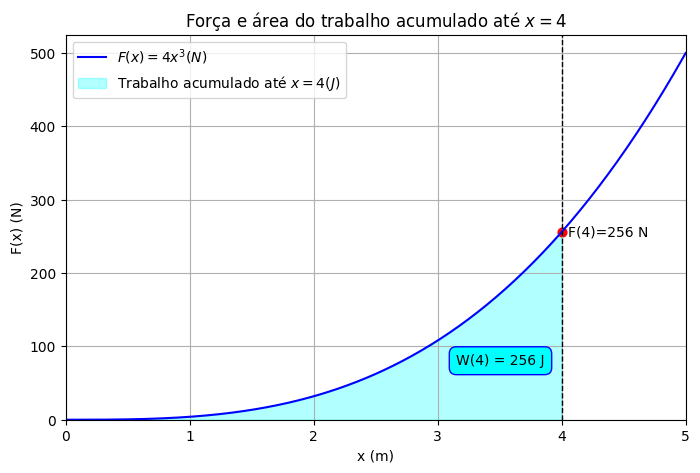

In [86]:
# Mostrando W(x) como gráfico da área

# x = 4, F(4)
x0 = 4
F_x0 = forca_variavel_lambdified(x0)

# W(4)
W_x0 = trabalho_lambdified(x0)

# Criando o gráfico
plt.figure(figsize=(8, 5))

# Curva de F(x)
plt.plot(x_vals, forca_vals, label='$F(x) = 4x^3 (N)$', color='blue')

# Sombreando trabalho acumulado até W(4)
plt.fill_between(x_vals, 0, forca_vals, where=(x_vals <= x0), label='Trabalho acumulado até $ x = 4 (J)$', color='cyan', alpha=0.3)

# Assíntota vertical em x = 4
plt.axvline(x0, linestyle="--", linewidth=1, color="black")

# Plotando legenda para ponto (4, F(4))
plt.scatter([x0], [F_x0], s=40, color="red")
plt.text(x0 + 0.05, F_x0, f"F({x0})={F_x0:.0f} N", va="center")

# Plotando legenda para a área do trabalho acumulado
plt.annotate(f"W({x0}) = {W_x0:.0f} J", xy=(x0-0.85, 0.15*max(forca_vals)), bbox=dict(facecolor='cyan', edgecolor='blue', boxstyle='round,pad=0.5'))

# Adicionando legendas e configurações adicionais
plt.title('Força e área do trabalho acumulado até $x = 4$')
plt.xlabel('x (m)')
plt.ylabel('F(x) (N)')
plt.grid(True)
plt.legend()

# Limitando x e y no gráfico
plt.xlim(0, 5)
plt.ylim(0, max(forca_vals)*1.05)
plt.show()

## 4. Matemática – Área entre Curvas

A taxa de variação da função $f(x)$ é dada por: $f'(x) = 3x^2 - 4x + 5$

Sabendo que $f(1) = 2$, determine a expressão de $f(x)$.

In [87]:
# Definindo a função f'(x)
f_prime = 3*x**2 - 4*x + 5
f_prime

In [88]:
# Calculando a integral para obtermos f(x)
f = sp.integrate(f_prime, x) + C
f

In [89]:
# Resolvendo f(1) = 2 para encontrar C
equation = sp.Eq(f.subs(x, 1), 2)
C_val = sp.solve(equation)[0]
C_val

In [90]:
# Substituindo o valor de C (C = 2) para encontrarmos f(x)
f_num = f.subs(C, C_val)
f_num

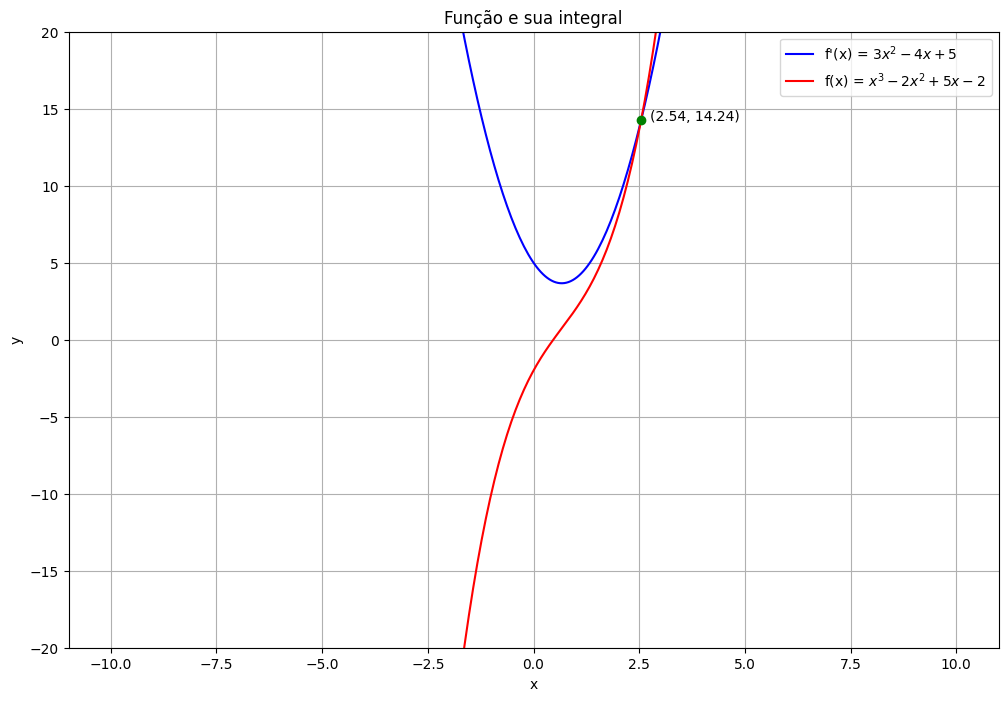

In [91]:
# Plotando os gráficos

# x_vals
x_vals = np.linspace(-10, 10, 400)

# Convertendo em funções lambda
f_prime_lambdified = sp.lambdify(x, f_prime, 'numpy')
f_lambdified = sp.lambdify(x, f_num, 'numpy')

# Calculando as funções para x_vals
f_prime_vals = f_prime_lambdified(x_vals)
f_vals = f_lambdified(x_vals)

# Criando o gráfico
plt.figure(figsize=(12, 8))

# Plotando as funções
plt.plot(x_vals, f_prime_vals, label='f\'(x) = $3x^2 - 4x + 5$', color='blue')
plt.plot(x_vals, f_vals, label='f(x) = $x^3 - 2x^2 + 5x - 2$', color='red')

# Calculando o ponto de interseção
# f'(x) = f(x)
x_intersecao = sp.solve(sp.Eq(f_prime, f_num), x)[2]
y_intersecao = f_prime_lambdified(x_intersecao)
# Ajustando as casas decimais para a legenda
x_intersecao_text = f"{x_intersecao:.2f}"
y_intersecao_text = f"{y_intersecao:.2f}"
# Plotando o ponto e a legenda
plt.plot(x_intersecao, y_intersecao, marker='o', color='green')
plt.text(x_intersecao+0.2, y_intersecao, f'({x_intersecao_text}, {y_intersecao_text})')

# Adicionando rótulos e legenda ao gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Limitando o eixo y para mostrar as curvas com mais precisão
plt.ylim(-20, 20)

# Mostrando o gráfico
plt.grid(True)
plt.title('Função e sua integral')
plt.show()

## 5. Biologia – Crescimento Populacional

A taxa instantânea de crescimento de uma população é dada por: $dP/dt = 100e^{0.02t}$

Sabendo que no instante inicial $t=0$ a população era $P(0) = 500$, determine a função $P(t)$. 

In [92]:
# Definindo a função P'(x)
p_prime = 100*E**(0.02*t)
p_prime

In [93]:
# Calculando a integral P(x)
p = sp.integrate(p_prime, t) + C
p

In [94]:
# Calculando C para P(0) = 500
p_0 = p.subs(t, 0)
equation = sp.Eq(p_0, 500)
C_val = sp.solve(equation)[0]
C_val

In [95]:
# Substituindo o valor de C na expressão
p_num = p.subs(C, C_val)
p_num

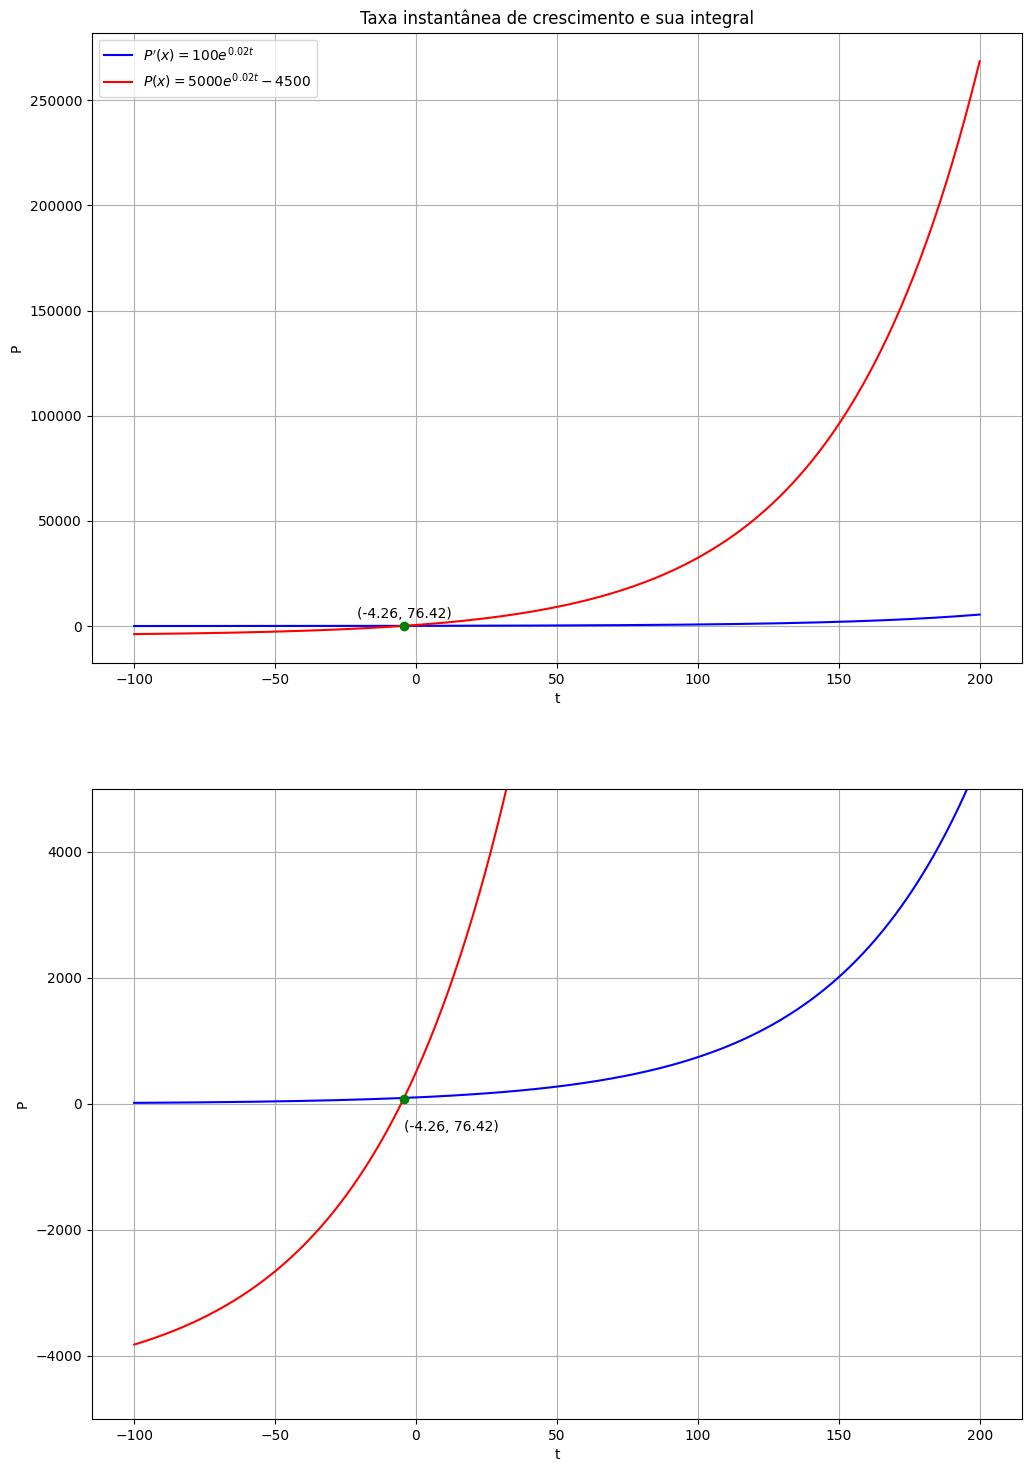

In [96]:
# Plotando os gráficos

# t_vals (valores para x)
t_vals = np.linspace(-100, 200, 400)

# Convertendo em funções lambda
p_prime_lambdified = sp.lambdify(t, p_prime, 'numpy')
p_lambdified = sp.lambdify(t, p_num, 'numpy')

# Calculando os valores de y
p_prime_vals = p_prime_lambdified(t_vals)
p_vals = p_lambdified(t_vals)

# Criando o gráfico
plt.figure(figsize=(12, 18))

# Plotando as funções
plt.subplot(2, 1, 1)
plt.plot(t_vals, p_prime_vals, label='$P\'(x) = 100e^{0.02t}$', color='blue')
plt.plot(t_vals, p_vals, label='$P(x) = 5000e^{0.02t} - 4500$', color='red')

# Adicionando rótulos e legenda ao gráfico
plt.xlabel('t')
plt.ylabel('P')
plt.legend()
plt.title('Taxa instantânea de crescimento e sua integral')
plt.grid(True)

# Ponto de interseção
x_intersecao = sp.solve(sp.Eq(p_prime, p_num), t)[0]
y_intersecao = f_prime_lambdified(x_intersecao)
x_intersecao_text = f'{x_intersecao:.2f}'
y_intersecao_text = f'{y_intersecao:.2f}'
plt.plot(x_intersecao, y_intersecao, marker='o', color='green')
plt.text(x_intersecao, y_intersecao+4000, f'({x_intersecao_text}, {y_intersecao_text})', ha='center')

plt.subplot(2, 1, 2)
plt.plot(t_vals, p_prime_vals, color='blue')
plt.plot(t_vals, p_vals, color='red')
plt.xlabel('t')
plt.ylabel('P')
plt.grid(True)
plt.ylim(-5000, 5000)
plt.plot(x_intersecao, y_intersecao, marker='o', color='green')
plt.text(x_intersecao, y_intersecao-500, f'({x_intersecao_text}, {y_intersecao_text})')

plt.show()